# *Датасет банка, который анализирует отклики клиентов на банковскую маркетинговую компанию для предсказания вероятности открытия депозита*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank = pd.read_csv('bank.csv')

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
bank.shape

(11162, 17)

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# *различные команды для изучения структуры и самого датасета в целом*

In [ ]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
bank['deposit'] = LabelEncoder().fit_transform(bank['deposit'])
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


Кодирование целей переменной 'deposit', требуется для того что бы переобразовать значения в битовое исчесление, поскольку модель не умеет работать со строками, переобразование 'yes' в 1 и 'no' в 0.

In [ ]:
bank = pd.get_dummies(bank, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
bank

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,True,False,...,False,False,False,False,False,False,False,False,False,True
11158,39,733,16,83,4,-1,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,32,29,19,156,2,-1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,43,0,8,9,2,172,5,0,False,False,...,False,False,False,True,False,False,False,False,False,False


*в общем и целом, данная функция выполняет роль автоматизатора разделения на labels, но я пока разобрал только функционал когда использует только уже заготовленные категории, в принципе и с числовымми значениями можно было бы использовать, предварительно разделив их на ranges, по средством функции. Если затронуть по подробнее функциона функции, она берет каждый столбез из вложенного мною списка, и разделяет по категориям на столбцы, создавая каждый столбец по логике <название родиительского стоолбца>_<название категории>, в конце можем заметить что прописанна функция, которая игнорирует первую по счету категорию, это сделанно во избежание **мультиколлинерности** данных, первого столбца не будет, но невербально она остается с нами, и исполняется когда все подстолбцы которые были разделены равны 0.*

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   deposit              11162 non-null  int64
 8   job_blue-collar      11162 non-null  bool 
 9   job_entrepreneur     11162 non-null  bool 
 10  job_housemaid        11162 non-null  bool 
 11  job_management       11162 non-null  bool 
 12  job_retired          11162 non-null  bool 
 13  job_self-employed    11162 non-null  bool 
 14  job_services         11162 non-null  bool 
 15  job_student          11162 non-null  bool 
 16  job_technician       1

*тут мы применили метод бинаризации категорияльных признаков, метод заключается в том, что бы разбить определенный столбец в котором содержится 3 и более вариантов. Действует таким образом что, разделяет эти варианты на 3 столбца и каждый из них служит своебразным индиктором, и то что оно теперь в бинарном формате так же служит подходящим для логической регрессии*

In [ ]:
X = bank.drop('deposit', axis=1)
y = bank['deposit']

*тут мы уже готовим переменные для обучения модели, к x для обучения присваиваем все столбцы кроем "deposit", поскольку оно является явялется целевой переменной, которую мы будем пытаться предсказать, поэтому назначаем к 'y', это необходимо что бы модель могла использовать признаки для обучения корректно предсказывать целевое значение.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*разделяем на данные для обучения и тестов, по соотнашению 8к2, и с ключем генерации рандомных чисел 42, что бы он всегда выдавал одни и те же рандоымные числа, которые помогут нам делать обьективный анализ.*

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*можем увидеть что логическая модель не смогла достичь оптимального решения в рамках заданных базовых настроек функционала линейной регрессии, придется подстраиваться*

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

*тут мы можем заменить, что после увеличений количества интераций это нам особо ничего не дало, за кадром я пробовал увеличевать в плость до 2000, но по прежнему выводилась ошибка о не достаточности этого. После попробовал изменить метод оптимезаций с базовового 'lbfgs', на тот что вы сейчас видите, и на мое удивление это сработало, и модель сформировалась без ошибок.*

In [ ]:
y_pred = model.predict(X_test)

Предсказываем значения на тестовой выборке

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8069861173309449
Precision: 0.810546875
Recall: 0.7778819119025304
F1-score: 0.7938785270205643
Confusion Matrix:
 [[972 194]
 [237 830]]


Метрики для определения качества модели.

*'accuracy' (0.80) - это показатель того с какой точносью модель справилась с предсказанием исхода.*

*'Precision' (0.81) - это показатель доли положительных предиктов в рамках правильных положительных и отрицательных предиктов*

*'Recall' (0.77) - это показатель долю правильных положительных предиктов в рамках всех положительных предиктов.*

*'f1_score' (0.79) - гармонирует между precision и recall, эта метрика необходима, когда нужно учитывать баланс между точностью и полнотой*

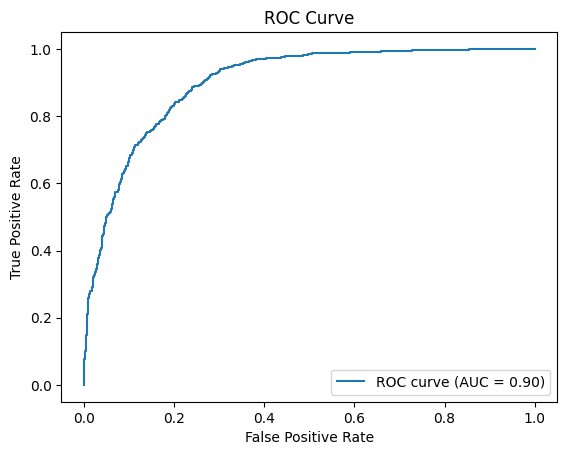

In [ ]:
#Построение ROC-кривой и расчет AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

*Необходима для визуализации способности модели отличать положительные результат от отрицательных. Ось Y является показатель правильных предтиков, и его апонентом является X, можем заменить на диаграмме что кривая с самого начала устремилась на верх и весь свой путь все дальше и дальше идет на верх, чем ближе к значению 1 тем лучше модель справилась со своей задачей. ROC - в целом используется для выявления того насколько модель хорошо распознает различные классы*

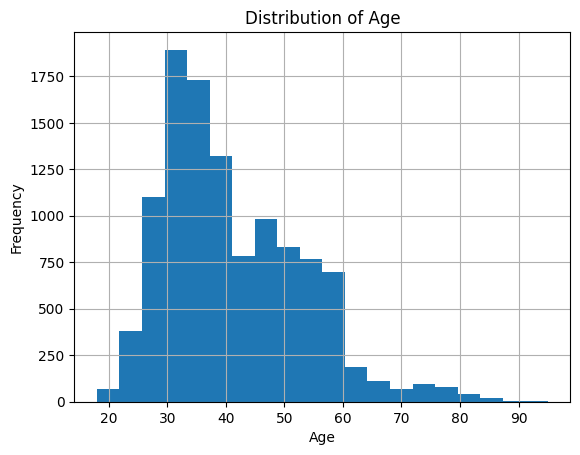

In [ ]:
bank['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()